In [185]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# import & prepare the data

In [186]:
data = pd.read_csv('listings.csv')
data.head(10)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89
5,5956968,https://www.airbnb.com/rooms/5956968,20160104002432,2016-01-04,Private unit in a 1920s mansion,We're renting out a small private unit of one ...,If you include a bit of your background in you...,We're renting out a small private unit of one ...,none,This part of Queen Anne has wonderful views an...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,1,2.45
6,1909058,https://www.airbnb.com/rooms/1909058,20160104002432,2016-01-04,Queen Anne Private Bed and Bath,Enjoy a quiet stay in our comfortable 1915 Cra...,Enjoy a quiet stay in our comfortable 1915 Cra...,Enjoy a quiet stay in our comfortable 1915 Cra...,none,"Close restaurants, coffee shops and grocery st...",...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,1,2.46
7,856550,https://www.airbnb.com/rooms/856550,20160104002432,2016-01-04,Tiny Garden cabin on Queen Anne,"Our tiny cabin is private , very quiet and com...","This cabin was built with Airbnb in mind, Que...","Our tiny cabin is private , very quiet and com...",none,We are centrally located between Downtown and ...,...,10.0,f,NaN,WASHINGTON,f,strict,t,t,5,4.73
8,4948745,https://www.airbnb.com/rooms/4948745,20160104002432,2016-01-04,Urban Charm || Downtown || Views,"Nestled in the heart of the city, this space i...","Located in the heart of the city, this space i...","Nestled in the heart of the city, this space i...",none,Walking Score: 92 4 blocks from Kerry Park Fam...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,1,1.22
9,2493658,https://www.airbnb.com/rooms/2493658,20160104002432,2016-01-04,Airy + Bright Queen Anne Apartment,"Beautiful apartment in an extremely safe, quie...",What's special about this place? A beautiful r...,"Beautiful apartment in an extremely safe, quie...",none,"Queen Anne is a wonderful, truly functional vi...",...,9.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.55


In [187]:
data.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'thumbnail_url', 'medium_url', 'picture_url',
       'xl_picture_url', 'host_id', 'host_url', 'host_name', 'host_since',
       'host_location', 'host_about', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood',
       'host_listings_count', 'host_total_listings_count',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'street', 'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', '

In [188]:
# choosing only the columns that we are going to use
df=data[['id', 'name','instant_bookable',
       'host_location', 
       'host_listings_count','host_verifications', 'host_identity_verified',
       'city', 'state',
       'smart_location', 
        'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', 'square_feet',
        'guests_included', 'extra_people', 'minimum_nights',
       'maximum_nights', 'availability_365',
         'review_scores_rating', 'neighbourhood',
       'cancellation_policy','number_of_reviews','price']]

df.head(10)

,id,name,instant_bookable,host_location,host_listings_count,host_verifications,host_identity_verified,city,state,smart_location,...,guests_included,extra_people,minimum_nights,maximum_nights,availability_365,review_scores_rating,neighbourhood,cancellation_policy,number_of_reviews,price
0,241032,Stylish Queen Anne Apartment,f,"Seattle, Washington, United States",3.0,"['email', 'phone', 'reviews', 'kba']",t,Seattle,WA,"Seattle, WA",...,2,$5.00,1,365,346,95.0,Queen Anne,moderate,207,$85.00
1,953595,Bright & Airy Queen Anne Apartment,f,"Seattle, Washington, United States",6.0,"['email', 'phone', 'facebook', 'linkedin', 're...",t,Seattle,WA,"Seattle, WA",...,1,$0.00,2,90,291,96.0,Queen Anne,strict,43,$150.00
2,3308979,New Modern House-Amazing water view,f,"Seattle, Washington, United States",2.0,"['email', 'phone', 'google', 'reviews', 'jumio']",t,Seattle,WA,"Seattle, WA",...,10,$25.00,4,30,220,97.0,Queen Anne,strict,20,$975.00
3,7421966,Queen Anne Chateau,f,"Seattle, Washington, United States",1.0,"['email', 'phone', 'facebook', 'reviews', 'jum...",t,Seattle,WA,"Seattle, WA",...,1,$0.00,1,1125,143,NaN,Queen Anne,flexible,0,$100.00
4,278830,Charming craftsman 3 bdm house,f,"Seattle, Washington, United States",2.0,"['email', 'phone', 'facebook', 'reviews', 'kba']",t,Seattle,WA,"Seattle, WA",...,6,$15.00,1,1125,365,92.0,Queen Anne,strict,38,$450.00
5,5956968,Private unit in a 1920s mansion,f,"Seattle, Washington, United States",1.0,"['email', 'phone', 'facebook', 'reviews', 'kba']",t,Seattle,WA,"Seattle, WA",...,1,$30.00,1,6,302,95.0,Queen Anne,strict,17,$120.00
6,1909058,Queen Anne Private Bed and Bath,f,"Seattle, Washington, United States",1.0,"['email', 'phone', 'reviews', 'kba']",t,Seattle,WA,"Seattle, WA",...,1,$10.00,3,14,346,99.0,Queen Anne,moderate,58,$80.00
7,856550,Tiny Garden cabin on Queen Anne,f,"Seattle, Washington, United States",5.0,"['email', 'phone', 'facebook', 'google', 'link...",t,Seattle,WA,"Seattle, WA",...,1,$0.00,2,7,100,97.0,Queen Anne,strict,173,$60.00
8,4948745,Urban Charm || Downtown || Views,f,"Seattle, Washington, United States",1.0,"['email', 'phone', 'facebook', 'linkedin', 're...",t,Seattle,WA,"Seattle, WA",...,1,$0.00,3,1125,341,97.0,Queen Anne,strict,8,$90.00
9,2493658,Airy + Bright Queen Anne Apartment,f,"Seattle, Washington, United States",6.0,"['email', 'phone', 'facebook', 'linkedin', 're...",t,Seattle,WA,"Seattle, WA",...,1,$0.00,2,365,324,97.0,Queen Anne,strict,32,$150.00


In [189]:
df.describe(include=object)

,name,instant_bookable,host_location,host_verifications,host_identity_verified,city,state,smart_location,property_type,room_type,bed_type,amenities,extra_people,neighbourhood,cancellation_policy,price
count,3818,3818,3810,3818,3816,3818,3818,3818,3817,3818,3818,3818,3818,3402,3818,3818
unique,3792,2,120,116,2,7,2,7,16,3,5,3284,45,81,3,273
top,Capitol Hill Apartment,f,"Seattle, Washington, United States","['email', 'phone', 'facebook', 'reviews', 'kba']",t,Seattle,WA,"Seattle, WA",House,Entire home/apt,Real Bed,{},$0.00,Capitol Hill,strict,$150.00
freq,3,3227,3259,595,2997,3810,3817,3810,1733,2541,3657,45,2048,351,1417,162


### The Missing Values

In [190]:
df.isnull().values.any()

True

In [191]:
df.isna().any()

id                        False
name                      False
instant_bookable          False
host_location              True
host_listings_count        True
host_verifications        False
host_identity_verified     True
city                      False
state                     False
smart_location            False
property_type              True
room_type                 False
accommodates              False
bathrooms                  True
bedrooms                   True
beds                       True
bed_type                  False
amenities                 False
square_feet                True
guests_included           False
extra_people              False
minimum_nights            False
maximum_nights            False
availability_365          False
review_scores_rating       True
neighbourhood              True
cancellation_policy       False
number_of_reviews         False
price                     False
dtype: bool

In [192]:
(df.dtypes!="object").sort_values()

price                     False
amenities                 False
bed_type                  False
neighbourhood             False
room_type                 False
property_type             False
state                     False
smart_location            False
host_identity_verified    False
host_verifications        False
cancellation_policy       False
host_location             False
instant_bookable          False
name                      False
city                      False
extra_people              False
minimum_nights             True
review_scores_rating       True
availability_365           True
maximum_nights             True
id                         True
square_feet                True
beds                       True
number_of_reviews          True
bathrooms                  True
accommodates               True
host_listings_count        True
guests_included            True
bedrooms                   True
dtype: bool

In [193]:
df.isna().sum().sort_values()

id                           0
cancellation_policy          0
availability_365             0
maximum_nights               0
minimum_nights               0
extra_people                 0
guests_included              0
amenities                    0
bed_type                     0
number_of_reviews            0
accommodates                 0
price                        0
host_verifications           0
name                         0
smart_location               0
instant_bookable             0
state                        0
city                         0
room_type                    0
property_type                1
beds                         1
host_listings_count          2
host_identity_verified       2
bedrooms                     6
host_location                8
bathrooms                   16
neighbourhood              416
review_scores_rating       647
square_feet               3721
dtype: int64

In [194]:
# since the null values of the numerical columns are few, I will fill them with the mean 
# because it's more suitable so the values usually around the mean
df.fillna(df.mean())

,id,name,instant_bookable,host_location,host_listings_count,host_verifications,host_identity_verified,city,state,smart_location,...,guests_included,extra_people,minimum_nights,maximum_nights,availability_365,review_scores_rating,neighbourhood,cancellation_policy,number_of_reviews,price
0,241032,Stylish Queen Anne Apartment,f,"Seattle, Washington, United States",3.0,"['email', 'phone', 'reviews', 'kba']",t,Seattle,WA,"Seattle, WA",...,2,$5.00,1,365,346,95.000000,Queen Anne,moderate,207,$85.00
1,953595,Bright & Airy Queen Anne Apartment,f,"Seattle, Washington, United States",6.0,"['email', 'phone', 'facebook', 'linkedin', 're...",t,Seattle,WA,"Seattle, WA",...,1,$0.00,2,90,291,96.000000,Queen Anne,strict,43,$150.00
2,3308979,New Modern House-Amazing water view,f,"Seattle, Washington, United States",2.0,"['email', 'phone', 'google', 'reviews', 'jumio']",t,Seattle,WA,"Seattle, WA",...,10,$25.00,4,30,220,97.000000,Queen Anne,strict,20,$975.00
3,7421966,Queen Anne Chateau,f,"Seattle, Washington, United States",1.0,"['email', 'phone', 'facebook', 'reviews', 'jum...",t,Seattle,WA,"Seattle, WA",...,1,$0.00,1,1125,143,94.539262,Queen Anne,flexible,0,$100.00
4,278830,Charming craftsman 3 bdm house,f,"Seattle, Washington, United States",2.0,"['email', 'phone', 'facebook', 'reviews', 'kba']",t,Seattle,WA,"Seattle, WA",...,6,$15.00,1,1125,365,92.000000,Queen Anne,strict,38,$450.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3813,8101950,3BR Mountain View House in Seattle,f,US,354.0,"['email', 'phone', 'linkedin', 'reviews', 'jum...",t,Seattle,WA,"Seattle, WA",...,1,$0.00,3,1125,32,80.000000,Fremont,strict,1,$359.00
3814,8902327,Portage Bay View!-One Bedroom Apt,f,"Seattle, Washington, United States",1.0,"['email', 'phone', 'facebook', 'reviews', 'jum...",t,Seattle,WA,"Seattle, WA",...,3,$25.00,2,29,273,100.000000,Portage Bay,moderate,2,$79.00
3815,10267360,Private apartment view of Lake WA,f,US,1.0,['phone'],f,Seattle,WA,"Seattle, WA",...,2,$20.00,1,7,88,94.539262,NaN,moderate,0,$93.00
3816,9604740,Amazing View with Modern Comfort!,f,"Tacoma, Washington, United States",1.0,"['email', 'phone', 'facebook', 'reviews', 'kba']",t,Seattle,WA,"Seattle, WA",...,1,$0.00,3,1125,179,94.539262,NaN,moderate,0,$99.00


In [195]:
#Extracting prices from the table
price = df['price']
prices=[]


#clean the data to Convert prices to float
def conv_price(df,prices):
    
    """ 
        This code will Convert price column that is currently
        object (string) type and have ',' in the thousand position 
        and return a new column that is float type and replace the old column
    """
    
    for p in df['price']:
        p=float(p[1:].replace(',',''))
        prices.append(p)

    #replace the price column with the new column
    df['price']=prices
    return df

df= conv_price(df,prices)

C:\Users\DELL\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [196]:
df.isna().any()

id                        False
name                      False
instant_bookable          False
host_location              True
host_listings_count        True
host_verifications        False
host_identity_verified     True
city                      False
state                     False
smart_location            False
property_type              True
room_type                 False
accommodates              False
bathrooms                  True
bedrooms                   True
beds                       True
bed_type                  False
amenities                 False
square_feet                True
guests_included           False
extra_people              False
minimum_nights            False
maximum_nights            False
availability_365          False
review_scores_rating       True
neighbourhood              True
cancellation_policy       False
number_of_reviews         False
price                     False
dtype: bool

In [197]:
df2 = pd.read_csv('calendar.csv')
df2.head(10)

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN
5,241032,2016-01-09,f,NaN
6,241032,2016-01-10,f,NaN
7,241032,2016-01-11,f,NaN
8,241032,2016-01-12,f,NaN
9,241032,2016-01-13,t,$85.00


In [198]:
df2.describe(include=object)

,date,available,price
count,1393570,1393570,934542
unique,365,2,669
top,2016-09-21,t,$150.00
freq,3818,934542,36646


In [199]:
df2.isna().any()

listing_id    False
date          False
available     False
price          True
dtype: bool

In [200]:
df2.head(10)

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN
5,241032,2016-01-09,f,NaN
6,241032,2016-01-10,f,NaN
7,241032,2016-01-11,f,NaN
8,241032,2016-01-12,f,NaN
9,241032,2016-01-13,t,$85.00


In [201]:
# replacing NaN values with 0 for the price column
df2.fillna("$0.00", inplace=True)

#Extracting prices from the table
price2 = df2['price']
prices2=[]


df2= conv_price(df2,prices2)

In [202]:
#replace t with 1, and f with 0
df2["available"].replace({"t": True, "f": False}, inplace=True)

In [203]:
# drop null values in neighbourhood column bc we won't need it 
# since it won't help us in answering the questions
df.drop(df.loc[df['neighbourhood']==0].index, inplace=True)

# Q1: What is the Factors that has the most effect on the price?

In [204]:
# here we can see the most strong correlations with the column price as a list
correlations = df.corr()
correlations = correlations["price"].sort_values(ascending=False)
features = correlations.index[1:6]
correlations

price                   1.000000
accommodates            0.652218
bedrooms                0.627720
beds                    0.589525
square_feet             0.531752
bathrooms               0.516424
guests_included         0.392875
host_listings_count     0.093962
review_scores_rating    0.055551
minimum_nights          0.017297
maximum_nights         -0.003336
availability_365       -0.015550
id                     -0.046289
number_of_reviews      -0.124695
Name: price, dtype: float64

In [205]:
# here we want to see the most strong correlations with the column price as a heat map
# which makes it easier to notice  the strong/weak ones
df.corr().style.background_gradient(cmap='coolwarm')

,id,host_listings_count,accommodates,bathrooms,bedrooms,beds,square_feet,guests_included,minimum_nights,maximum_nights,availability_365,review_scores_rating,number_of_reviews,price
id,1,-0.0233118,-0.0742791,-0.0618206,-0.0641133,-0.0505683,-0.170288,-0.103058,-0.0216012,0.101529,-0.159447,0.0392456,-0.506105,-0.0462891
host_listings_count,-0.0233118,1,0.11121,0.0682263,0.0659309,0.0854898,-0.0202235,-0.0592895,0.00189375,0.022684,0.0860376,-0.109357,-0.0622201,0.0939622
accommodates,-0.0742791,0.11121,1,0.538439,0.770974,0.861119,0.439057,0.532796,0.0170967,0.00329139,-0.0315345,-0.0131008,-0.0729782,0.652218
bathrooms,-0.0618206,0.0682263,0.538439,1,0.610937,0.532838,0.381094,0.30478,0.00635803,-0.0153221,-0.00232631,0.0451011,-0.0921474,0.516424
bedrooms,-0.0641133,0.0659309,0.770974,0.610937,1,0.753167,0.448786,0.457009,0.0119569,-0.00859111,-0.0497878,0.0232565,-0.105555,0.62772
beds,-0.0505683,0.0854898,0.861119,0.532838,0.753167,1,0.312155,0.460512,0.00267035,-0.0091136,-0.00977318,-0.000720366,-0.0890766,0.589525
square_feet,-0.170288,-0.0202235,0.439057,0.381094,0.448786,0.312155,1,0.471582,0.115664,0.0266425,0.0258562,0.143793,-0.21197,0.531752
guests_included,-0.103058,-0.0592895,0.532796,0.30478,0.457009,0.460512,0.471582,1,-0.00165898,-0.0186373,-0.0489221,-0.00143025,0.0281137,0.392875
minimum_nights,-0.0216012,0.00189375,0.0170967,0.00635803,0.0119569,0.00267035,0.115664,-0.00165898,1,0.00316117,0.00908695,0.00139168,-0.0138178,0.0172974
maximum_nights,0.101529,0.022684,0.00329139,-0.0153221,-0.00859111,-0.0091136,0.0266425,-0.0186373,0.00316117,1,0.00726457,-0.0313134,-0.0815782,-0.00333582


# what is the best month in availability and price

In [206]:
#Extracting just the Month from date column
df2['month'] = pd.DatetimeIndex(df2['date']).month
df2['month'] 

0           1
1           1
2           1
3           1
4           1
           ..
1393565    12
1393566    12
1393567    12
1393568     1
1393569     1
Name: month, Length: 1393570, dtype: int64

### what is the best month in availability

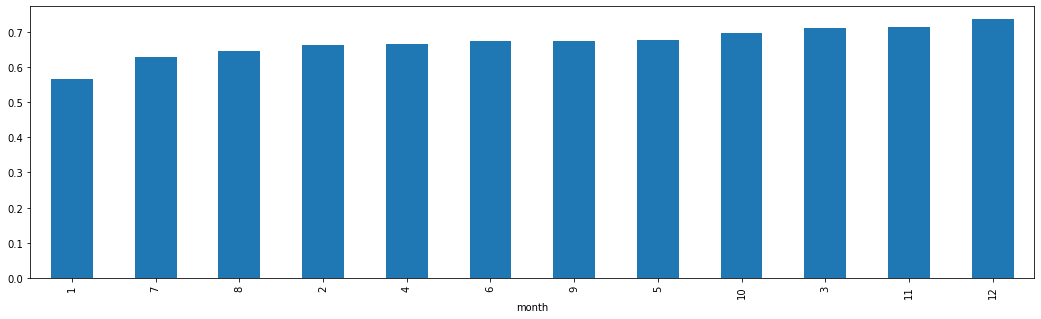

In [207]:
# here the bar chart will show us which month has high probability of having many available choices
av=df2.groupby(['month'])['available'].mean().sort_values()
av.plot(kind='bar',figsize=(18,5))

### what is the best month in price

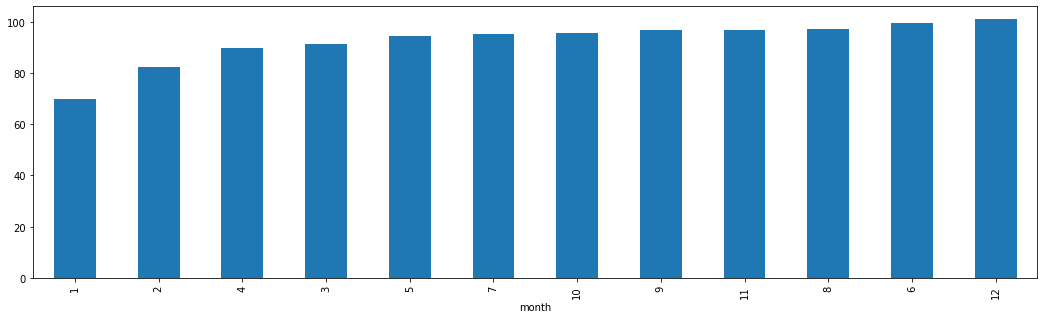

In [208]:
# here the bar chart will show us which month has high probability of having less prices
pr=df2.groupby(['month'])['price'].mean().sort_values()
pr.plot(kind='bar',figsize=(18,5))

# what is the best neighborhood in availability and price

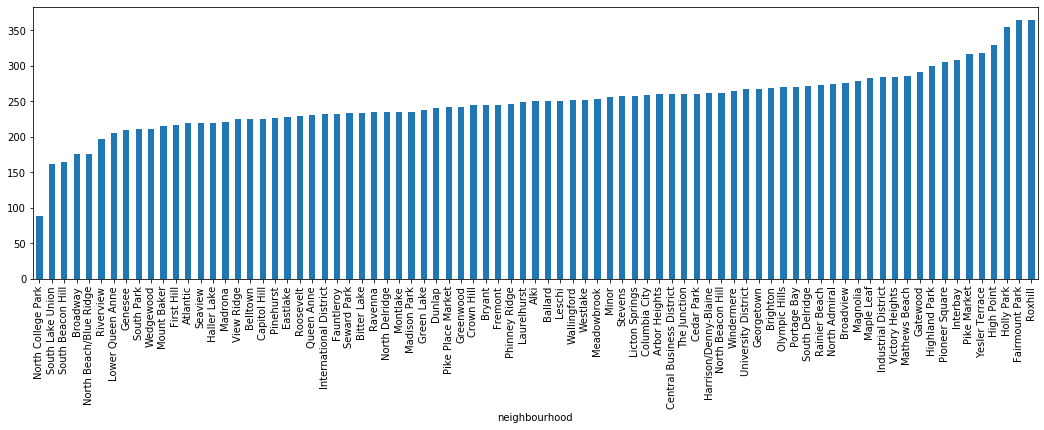

In [209]:
# here the bar chart will show us which neighborhood has high probability of having many available choices
pr=df.groupby(['neighbourhood'])['availability_365'].mean().sort_values()
pr.plot(kind='bar', figsize=(18,5))

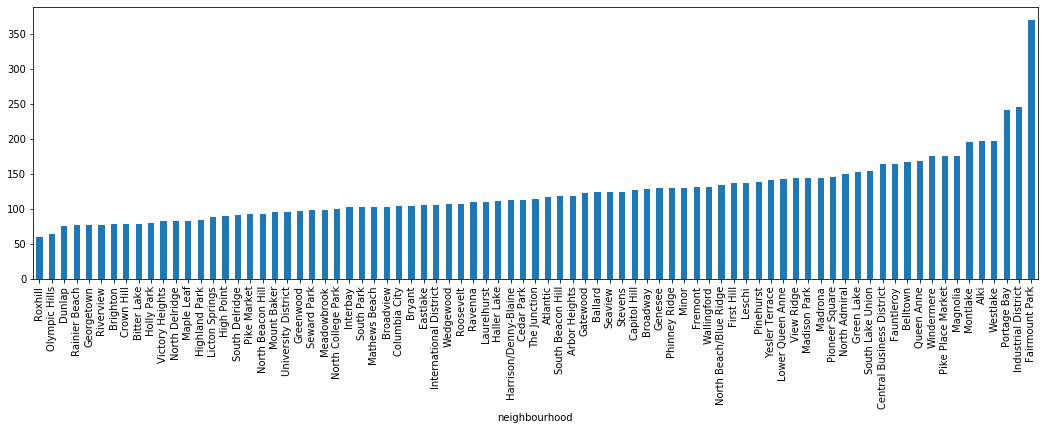

In [210]:
# here the bar chart will show us which neighborhood has high probability of having less prices
pr=df.groupby(['neighbourhood'])['price'].mean().sort_values()
pr.plot(kind='bar', figsize=(18,5))